In [3]:
using HDF5
using PyPlot
include("../Grid.jl")
include("../Markers.jl")
include("Topo.jl")

get_numerical_time_viscous (generic function with 1 method)

In [5]:
# fname = "Model_Outputs/ModelRun09-08-2023_15:53:04/data.hdf5" # modeul run for 10 - 25km of lambda and hice
# fname = "Model_Outputs/ModelRun09-09-2023_21:41:35/data.hdf5" # model run for 10km hice and 100km lambda
# fname = "Model_Outputs/ModelRun09-10-2023_14:42:33/data.hdf5" #  model run for 10km hice and 100km lambda
# fname = "Model_Outputs/ModelRun09-10-2023_15:33:52/data.hdf5" # model run for 10 - 100km of lambda and hice
# fname = "Model_Outputs/ModelRun09-11-2023_14:11:07/data.hdf5"
fname = "combined_output.hdf5"
# Displaying all of the file's information
fid = h5open(fname, "r")

🗂️ HDF5.File: (read-only) combined_output.hdf5
└─ 📂 Combined Model Run
   ├─ 🏷️ Description
   ├─ 🔢 Fitted Thickening Time
   ├─ 🔢 Fitted Viscous Relaxation Time
   ├─ 🔢 Ice Shell Thickness
   ├─ 🔢 Thickening Time
   ├─ 🔢 Viscous Relaxation Time(Half-Space)
   ├─ 🔢 Viscous Relaxation Time(Model)
   └─ 🔢 Wavelength

In [7]:
# Reading Data from file
modeldata = fid["Combined Model Run"];

In [8]:
# Displaying the contents in Model Run group 
for obj in modeldata
    data = read(obj)
    println(obj)
    display(data)
end

# Accessing Model Run contents that I want
Wavelength = read(modeldata,"Wavelength");
Ice_shell = read(modeldata, "Ice Shell Thickness");
Time_halfspace = read(modeldata,"Viscous Relaxation Time(Halfspace)");
Time_rel = read(modeldata,"Viscous Relaxation Time(Model)");
Time_thickening = read(modeldata, "Thickening Time");
# Time_rel_fitted = read(modeldata, "Fitted Viscous Relaxation Time");
# Time_rel_fitted_amp = read(modeldata,"Viscous Relaxation Time with Fitted Amplitude(Model)");

HDF5.Dataset: /Combined Model Run/Fitted Thickening Time (file: combined_output.hdf5 xfer_mode: 0)


0×0 Matrix{Float64}

HDF5.Dataset: /Combined Model Run/Fitted Viscous Relaxation Time (file: combined_output.hdf5 xfer_mode: 0)


0×0 Matrix{Float64}

HDF5.Dataset: /Combined Model Run/Ice Shell Thickness (file: combined_output.hdf5 xfer_mode: 0)


Float64[]

HDF5.Dataset: /Combined Model Run/Thickening Time (file: combined_output.hdf5 xfer_mode: 0)


0×0 Matrix{Float64}

HDF5.Dataset: /Combined Model Run/Viscous Relaxation Time(Half-Space) (file: combined_output.hdf5 xfer_mode: 0)


0×0 Matrix{Float64}

HDF5.Dataset: /Combined Model Run/Viscous Relaxation Time(Model) (file: combined_output.hdf5 xfer_mode: 0)


0×0 Matrix{Float64}

HDF5.Dataset: /Combined Model Run/Wavelength (file: combined_output.hdf5 xfer_mode: 0)


Float64[]

LoadError: KeyError: key "Viscous Relaxation Time(Halfspace)" not found

In [7]:
# Close file
close(fid)

In [8]:
println("Wavelength: $Wavelength")
println("Ice Shell Thickness: $Ice_shell")
println("Viscous Relaxation Time (Half-Space): $Time_halfspace")
println("Viscous Relaxation Time (Model): $Time_rel")
println("Thickening Time: $Time_thickening")
# println("Fitted Viscous Relaxation Time: $Time_rel_fitted")
# println("Viscous Relaxation Time with Fitted Amplitude(Model): $Time_rel_fitted_amp")

Wavelength: [10.0, 22.857142857142858, 35.714285714285715, 48.57142857142857, 61.42857142857143, 74.28571428571429, 87.14285714285714, 100.0]
Ice Shell Thickness: [10.0, 21.25, 32.5, 43.75, 55.0, 66.25, 77.5, 88.75, 100.0]
Viscous Relaxation Time (Half-Space): [4412.969031591225 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 1930.6739513211612 1930.6739513211612 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 1235.631328845543 1235.631328845543 1235.631328845543 0.0 0.0 0.0 0.0 0.0 0.0; 908.5524476805464 908.5524476805464 908.5524476805464 908.5524476805464 0.0 0.0 0.0 0.0 0.0; 718.3903074683391 718.3903074683391 718.3903074683391 718.3903074683391 718.3903074683391 0.0 0.0 0.0 0.0; 594.0535234834342 594.0535234834342 594.0535234834342 594.0535234834342 594.0535234834342 594.0535234834342 0.0 0.0 0.0; 506.40628231374717 506.40628231374717 506.40628231374717 506.40628231374717 506.40628231374717 506.40628231374717 506.40628231374717 0.0 0.0; 441.29690315912256 441.29690315912256 441.29690315912256 441.29690315912256 44

In [9]:
vec(Time_thickening) > vec(Time_rel)

true

In [10]:
vec(Time_rel) > vec(Time_halfspace)

true

In [24]:
display(Time_rel)
display(Time_thickening)


8×9 Matrix{Float64}:
  27517.6            0.0        …      0.0      0.0      0.0      0.0
      1.49154e5  19614.1               0.0      0.0      0.0      0.0
      3.52299e5  47576.1               0.0      0.0      0.0      0.0
 611379.0        95110.6               0.0      0.0      0.0      0.0
      9.43604e5      1.51728e5         0.0      0.0      0.0      0.0
      1.33755e6      2.19489e5  …   7268.06     0.0      0.0      0.0
      1.80002e6      2.95141e5      9723.95  6180.63     0.0      0.0
      2.32661e6      3.75346e5     13625.1   7931.52  5242.76  4183.37

8×9 Matrix{Float64}:
 2.78591e6  0.0        0.0        …  0.0        0.0        0.0
 2.78591e6  1.25801e7  0.0           0.0        0.0        0.0
 2.78591e6  1.25801e7  2.94262e7     0.0        0.0        0.0
 2.78591e6  1.25801e7  2.94262e7     0.0        0.0        0.0
 2.78591e6  1.25801e7  2.94262e7     0.0        0.0        0.0
 2.78591e6  1.25801e7  2.94262e7  …  0.0        0.0        0.0
 2.78591e6  1.25801e7  2.94262e7     1.67329e8  0.0        0.0
 2.78591e6  1.25801e7  2.94262e7     1.67329e8  2.19434e8  2.78591e8

In [12]:
Time_rel/Time_halfspace

8×8 Matrix{Float64}:
   6.23561    0.0      0.0     -0.0      …   0.0           0.0
  29.3543    10.1592   0.0     -0.0          0.0           0.0
  69.0517    17.3609  11.377   -0.0          0.0           0.0
 116.989     35.6085  13.0928  11.2093       0.0          -1.84338e-15
 179.443     54.908   24.0937   7.99733      1.55536e-15  -1.38253e-15
 253.357     78.1889  35.0463  14.4227   …   7.77681e-16   0.0
 341.013    103.889   46.6991  20.8094      12.2049       -3.68676e-15
 442.167    127.977   62.3171  28.9678       6.35548      10.68

In [13]:
# display(Time_rel/Time_rel_fitted_amp)

In [14]:
# display(Time_rel_fitted_amp/Time_halfspace)

In [15]:
display(transpose(Wavelength)./Ice_shell)

9×8 Matrix{Float64}:
 1.0       2.28571   3.57143   4.85714   …  7.42857   8.71429   10.0
 0.470588  1.07563   1.68067   2.28571      3.4958    4.10084    4.70588
 0.307692  0.703297  1.0989    1.49451      2.28571   2.68132    3.07692
 0.228571  0.522449  0.816327  1.1102       1.69796   1.99184    2.28571
 0.181818  0.415584  0.649351  0.883117     1.35065   1.58442    1.81818
 0.150943  0.345013  0.539084  0.733154  …  1.12129   1.31536    1.50943
 0.129032  0.294931  0.460829  0.626728     0.958525  1.12442    1.29032
 0.112676  0.257545  0.402414  0.547284     0.837022  0.981891   1.12676
 0.1       0.228571  0.357143  0.485714     0.742857  0.871429   1.0

In [28]:
size(Wavelength)
size(Ice_shell)


(9,)

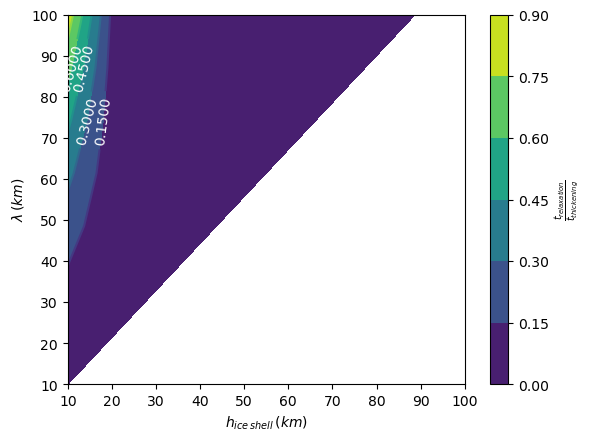

Figure(PyObject <Figure size 640x480 with 0 Axes>)

In [34]:
figure()

# cs = contour(Wavelength,Ice_shell,Time_vis/Time_thickening,locator=plt.LogLocator())
# clabel(cs,inline=true,colors="w",fontsize=10)
# contourf(Wavelength,Ice_shell,Time_vis./Time_thickening,cmap=get_cmap("viridis"))

cs = contour(Ice_shell,Wavelength,Time_rel ./ Time_thickening)
clabel(cs,inline=true,fmt="%0.4f",colors="w",fontsize=10)
contourf(Ice_shell,Wavelength,Time_rel ./ Time_thickening,cmap=get_cmap("viridis"))
#title(L"\frac{t_{relaxation}}{t_{thickening}}")
colorbar(label=L"\frac{t_{relaxation}}{t_{thickening}}")
gca().set_ylabel(L"\lambda\,(km)")
gca().set_xlabel(L"h_{ice\,shell}\,(km)",rotation=0)
# gca().yaxis.set_label_coords(-0.23,0.5)
# gca().spines["top"].set_visible(false) # Hide the top edge of the axis
# gca().spines["right"].set_visible(false) # Hide the right edge of the axis
# gca().xaxis.set_ticks_position("bottom")
# gca().yaxis.set_ticks_position("left")
# gca().spines["left"].set_position(("axes",-0.03)) # Offset the left scale from the axis
# gca().spines["bottom"].set_position(("axes",-0.03)) # Offset the bottom scale from the axis
# gca().spines["top"].set_color("none") # Remove the top axis boundary
# gca().spines["right"].set_color("none") # Remove the right axis boundary
show()

figure()

# cs = contour(Time_halfspace./Time_thickening)
# clabel(cs,inline=true,colors="w",fontsize=10)
# contourf(Time_halfspace./Time_thickening,cmap=get_cmap("viridis"))

# cs = contour(Wavelength,Ice_shell,(Time_halfspace./Time_thickening))
# clabel(cs,inline=true,colors="w",fontsize=10)
# contourf(Wavelength,Ice_shell,(Time_halfspace./Time_thickening),cmap=get_cmap("viridis"))
# title(L"\frac{t_{half-space}}{t_{thickening}}")

# colorbar(label=L"\frac{t_{half-space}}{t_{thickening}}")
# gca().set_xlabel(L"\lambda\,(km)")
# gca().set_ylabel(L"h_{ice\,shell}\,(km)",rotation=0)
# gca().yaxis.set_label_coords(-0.23,0.5)
# gca().spines["top"].set_visible(false) # Hide the top edge of the axis
# gca().spines["right"].set_visible(false) # Hide the right edge of the axis
# gca().xaxis.set_ticks_position("bottom")
# gca().yaxis.set_ticks_position("left")
# gca().spines["left"].set_position(("axes",-0.03)) # Offset the left scale from the axis
# gca().spines["bottom"].set_position(("axes",-0.03)) # Offset the bottom scale from the axis
# # gca().spines["top"].set_color("none") # Remove the top axis boundary
# # gca().spines["right"].set_color("none") # Remove the right axis boundary
# show()

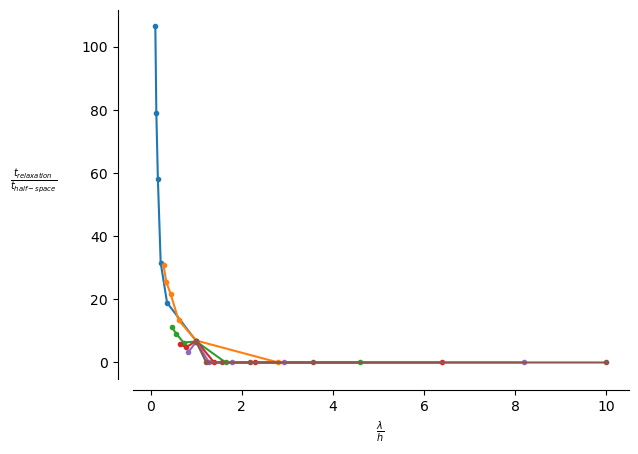

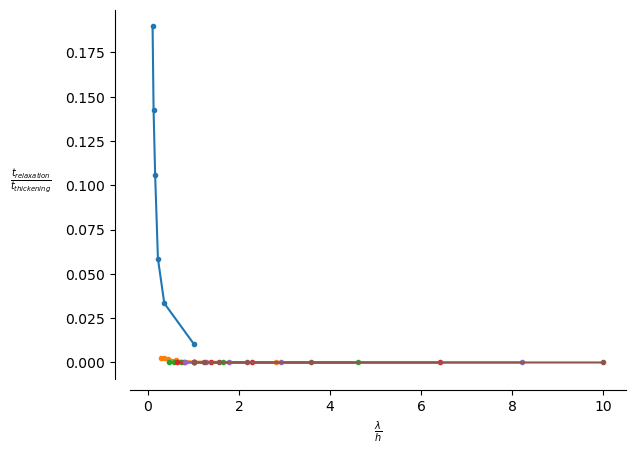

In [28]:
figure()
plot(transpose(Wavelength)./Ice_shell,Time_rel/Time_halfspace,".-")
gca().set_xlabel(L"\frac{\lambda}{h}")
gca().set_ylabel(L"\frac{t_{relaxation}}{t_{half-space}}",rotation=0)
gca().yaxis.set_label_coords(-0.2,0.5)
gca().spines["top"].set_visible(false) # Hide the top edge of the axis
gca().spines["right"].set_visible(false) # Hide the right edge of the axis
gca().xaxis.set_ticks_position("bottom")
gca().yaxis.set_ticks_position("left")
gca().spines["left"].set_position(("axes",-0.03)) # Offset the left scale from the axis
gca().spines["bottom"].set_position(("axes",-0.03)) # Offset the bottom scale from the axis
show()

figure()
plot(transpose(Wavelength)./Ice_shell,Time_rel/Time_thickening,".-")
gca().set_xlabel(L"\frac{\lambda}{h}")
gca().set_ylabel(L"\frac{t_{relaxation}}{t_{thickening}}",rotation=0)
gca().yaxis.set_label_coords(-0.2,0.5)
gca().spines["top"].set_visible(false) # Hide the top edge of the axis
gca().spines["right"].set_visible(false) # Hide the right edge of the axis
gca().xaxis.set_ticks_position("bottom")
gca().yaxis.set_ticks_position("left")
gca().spines["left"].set_position(("axes",-0.03)) # Offset the left scale from the axis
gca().spines["bottom"].set_position(("axes",-0.03)) # Offset the bottom scale from the axis
show()

In [ ]:
nx = 6
ny = 6
x = range(10.0,100.0,nx)
y = range(10.0,100.0,ny)
# z = zeros(nx,ny)
f(x,y) = get_halfspace_time_viscous(x*1e3)/get_thickening_time(y*1e3)
# z = @.f(x,y')

# figure()
# cs = contour(x,y,z)
# clabel(cs,inline=true,colors="w",fontsize=10)
# contourf(x,y,z)
# colorbar(label=L"\frac{t_{half-space}}{t_{thickening}}")
# title(L"\frac{t_{half-space}}{t_{thickening}}")
# gca().set_xlabel(L"\lambda")
# gca().set_ylabel(L"h_{ice\,shell}\,(km)",rotation=0)
# # gca().set_xlim([0.0,0.2])
# # gca().set_ylim([1.0,3.0])
# gca().yaxis.set_label_coords(-0.23,0.5)
# gca().spines["top"].set_visible(false) # Hide the top edge of the axis
# gca().spines["right"].set_visible(false) # Hide the right edge of the axis
# gca().xaxis.set_ticks_position("bottom")
# gca().yaxis.set_ticks_position("left")
# gca().spines["left"].set_position(("axes",-0.03)) # Offset the left scale from the axis
# gca().spines["bottom"].set_position(("axes",-0.03)) # Offset the bottom scale from the axis
# show()
# close() # Remove this line to show graph

""" or """

k = [f(i,j) for i in x, j in y]

figure()
cs = contour(x,y,k)
clabel(cs,inline=true,colors="w",fontsize=10)
contourf(x,y,k)
title(L"\frac{t_{half-space}}{t_{thickening}}")
colorbar(label=L"\frac{t_{half-space}}{t_{thickening}}")
gca().set_xlabel(L"\lambda\,(km)")
gca().set_ylabel(L"h_{ice\,shell}\,(km)",rotation=0)
# gca().set_xlim([0.0,0.2])
# gca().set_ylim([1.0,1.7])
gca().yaxis.set_label_coords(-0.23,0.5)
gca().spines["top"].set_visible(false) # Hide the top edge of the axis
gca().spines["right"].set_visible(false) # Hide the right edge of the axis
gca().xaxis.set_ticks_position("bottom")
gca().yaxis.set_ticks_position("left")
gca().spines["left"].set_position(("axes",-0.03)) # Offset the left scale from the axis
gca().spines["bottom"].set_position(("axes",-0.03)) # Offset the bottom scale from the axis
show()

figure()
plot(transpose(x)./y,k,".-",label="21")
gca().set_xlabel(L"\frac{\lambda}{h}")
gca().set_ylabel(L"\frac{t_{half-space}}{t_{thickening}}",rotation=0)
# gca().yaxis.set_label_coords(-0.2,0.5)
gca().spines["top"].set_visible(false) # Hide the top edge of the axis
gca().spines["right"].set_visible(false) # Hide the right edge of the axis
gca().xaxis.set_ticks_position("bottom")
gca().yaxis.set_ticks_position("left")
gca().spines["left"].set_position(("axes",-0.03)) # Offset the left scale from the axis
gca().spines["bottom"].set_position(("axes",-0.03)) # Offset the bottom scale from the axis
legend(loc="upper center", bbox_to_anchor=(0.5,-0.15),fancybox="True",shadow="True",ncol=5)
show()

In [ ]:
# Time_vis = vcat(map(x->x',Time_vis)...)

In [ ]:
# Time_halfspace = vcat(map(x->x',Time_halfspace)...)

In [ ]:
# tt = xx/yy
# tt = vcat(map(x->x',tt)...)

In [ ]:
# zz = Time_vis/Time_halfspace
# zz = vcat(map(x->x',zz)...)

In [ ]:
# nlambda = 2
# nhice = 2
# lambda = range(10.0,25.0,nlambda)
# h_ice = range(10.0,25.0,nhice)
# t_halfspace = zeros(nlambda,nhice)
# t_tic = zeros(nlambda,nhice)
# for i in 1:nlambda
#     for j in 1:nhice
#         ths = get_time_viscous(lambda[i]*1e3)
#         t_halfspace[i,j] = ths
#         ttic = get_thickening_time(h_ice[j]*1e3)
#         t_tic[i,j] = ttic
#     end
# end

# figure()
# contourf(t_halfspace./t_tic)
# colorbar(label=L"\frac{t_{halfspace}}{t_{thickening}}")
# gca().set_xlabel(L"\lambda")
# gca().set_ylabel(L"h_{ice\,shell}\,(km)",rotation=0)
# # gca().set_xlim([0.0,0.2])
# # gca().set_ylim([1.0,3.0])
# gca().yaxis.set_label_coords(-0.23,0.5)
# gca().spines["top"].set_visible(false) # Hide the top edge of the axis
# gca().spines["right"].set_visible(false) # Hide the right edge of the axis
# gca().xaxis.set_ticks_position("bottom")
# gca().yaxis.set_ticks_position("left")
# gca().spines["left"].set_position(("axes",-0.03)) # Offset the left scale from the axis
# gca().spines["bottom"].set_position(("axes",-0.03)) # Offset the bottom scale from the axis
# show()

# """ or """
# k = [f(x,y) for x in lambda, y in h_ice]

# figure()
# contourf(k)
# colorbar(label=L"\frac{t_{halfspace}}{t_{thickening}}")
# gca().set_xlabel(L"\lambda")
# gca().set_ylabel(L"h_{ice\,shell}\,(km)",rotation=0)
# # gca().set_xlim([0.0,0.2])
# # gca().set_ylim([1.0,3.0])
# gca().yaxis.set_label_coords(-0.23,0.5)
# gca().spines["top"].set_visible(false) # Hide the top edge of the axis
# gca().spines["right"].set_visible(false) # Hide the right edge of the axis
# gca().xaxis.set_ticks_position("bottom")
# gca().yaxis.set_ticks_position("left")
# gca().spines["left"].set_position(("axes",-0.03)) # Offset the left scale from the axis
# gca().spines["bottom"].set_position(("axes",-0.03)) # Offset the bottom scale from the axis
# show()